In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# Load data

In [4]:
data = pd.read_csv('data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data = data.rename(columns={"class": "class_param"})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2.0,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# где-то плохая обработка, потому что классов только 4. Уберём плохие
data['class_param'].unique()

array([ 2.,  4.,  1.,  3.,  0., nan])

In [6]:
data.class_param.fillna(0, inplace=True)
data = data.query('class_param == [1.0, 2.0, 3.0, 4.0]')
data['class_param'].unique()

array([2., 4., 1., 3.])

In [7]:
data = data.astype({'class_param': 'int'})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

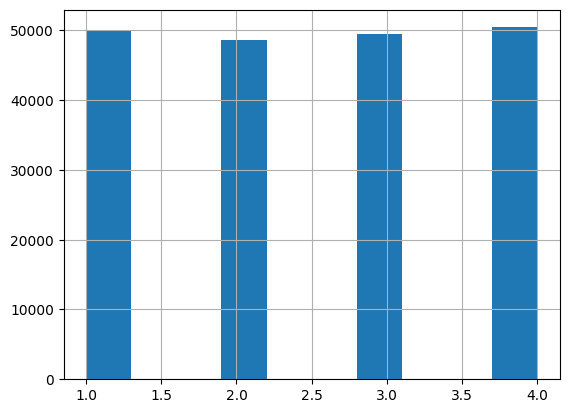

In [8]:
data.class_param.hist()

In [9]:
data.shape

(198649, 193)

# Models

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Y = data['class_param']
X = data.drop(columns='class_param')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139054, 192), (59595, 192), (139054,), (59595,))

## Decision Tree

In [13]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### Build Model

In [ ]:
parametrs = {'max_depth': range(10, 15), 'criterion': ['gini', 'entropy']}
tree_clf = DecisionTreeClassifier()
model_gridCV = GridSearchCV(tree_clf, parametrs, cv=4)

In [ ]:
model_gridCV.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15)})

In [ ]:
model_gridCV.best_params_, model_gridCV.best_score_

({'criterion': 'gini', 'max_depth': 13}, 0.7539732964806684)

In [ ]:
best_tree = model_gridCV.best_estimator_

In [ ]:
y_pred = best_tree.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred) # значенния accuracy

0.7531672120144307

In [ ]:
train_score = best_tree.score(X_train, y_train)
test_score = best_tree.score(X_test, y_test)

In [ ]:
train_score, test_score

(0.8741064622376918, 0.7531672120144307)

In [ ]:
feature_importances = best_tree.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances_': feature_importances})
feature_importances_df.sort_values('feature_importances_', ascending=False)
feature_importances_df

,features,feature_importances_
0,sns_1_sct_1_plus,0.002899
1,sns_1_sct_1_minus,0.003157
2,sns_1_sct_2_plus,0.011585
3,sns_1_sct_2_minus,0.004770
4,sns_1_sct_3_plus,0.012199
...,...,...
187,sns_3_sct_30_minus,0.000000
188,sns_3_sct_31_plus,0.000000
189,sns_3_sct_31_minus,0.000000
190,sns_3_sct_32_plus,0.000000


### Res Data


In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree,
                   feature_names=X.columns,
                   class_names=list(map(str, data.class_param.unique())),
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

In [ ]:
res_df = pd.DataFrame(model_gridCV.cv_results_)
res_df.head()

In [ ]:
res_df.drop(columns='params', inplace=True)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

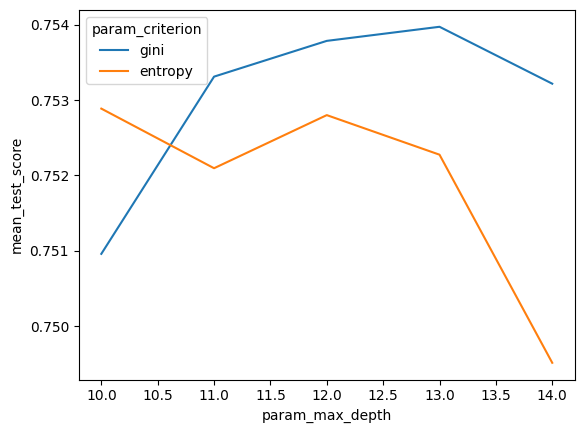

In [ ]:
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_criterion', data=res_df)

In [ ]:
# матрица ошибок
y_pred = best_tree.predict(X_test)

x_names = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4']
y_names = ['Real: 1', 'Real: 2', 'Real: 3', 'Real: 4']

arr_errors = (metrics.confusion_matrix(y_test, y_pred) / y_test.shape[0])
sns.heatmap(arr_errors, cmap='winter', annot=True, fmt=".2%", cbar=False, xticklabels=x_names, yticklabels=y_names)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(10, 31, 2), 'max_depth': range(4, 9), 'criterion': ['gini', 'entropy']}

In [ ]:
GridCV_rf = GridSearchCV(clf_rf, parametrs, n_jobs=-1)

In [ ]:
GridCV_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'n_estimators': range(10, 31, 2)})

In [ ]:
GridCV_rf.best_score_, GridCV_rf.best_params_

(0.8336258169210208, {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 30})

In [ ]:
best_rf = GridCV_rf.best_estimator_

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

train_score, test_score

<Axes: >

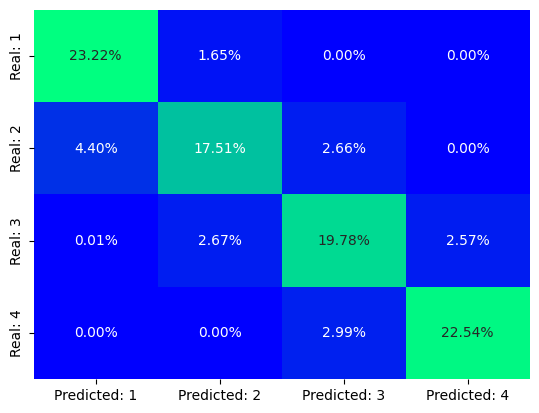

In [ ]:
# матрица ошибок
x_names = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4']
y_names = ['Real: 1', 'Real: 2', 'Real: 3', 'Real: 4']

arr_errors = (metrics.confusion_matrix(y_test, y_pred) / y_test.shape[0])
sns.heatmap(arr_errors, cmap='winter', annot=True, fmt=".2%", cbar=False, xticklabels=x_names, yticklabels=y_names)

In [ ]:
res_rf = pd.DataFrame(GridCV_rf.cv_results_)
res_rf.drop(columns=['params'], inplace=True)
res_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.258428,0.771297,0.095029,0.030805,gini,4,10,0.763043,0.774693,0.767646,0.768761,0.771377,0.769104,0.003883,106
1,5.290264,0.556437,0.080362,0.024926,gini,4,12,0.766064,0.780159,0.767790,0.764590,0.776375,0.770995,0.006141,105
2,5.909658,0.770291,0.069131,0.004358,gini,4,14,0.781022,0.777282,0.774622,0.777930,0.778065,0.777784,0.002041,99
3,6.645359,0.748839,0.074632,0.002865,gini,4,16,0.770091,0.788321,0.777606,0.783179,0.780295,0.779898,0.006055,96
4,6.969275,0.665448,0.083174,0.007136,gini,4,18,0.785229,0.777174,0.783287,0.780662,0.786767,0.782624,0.003404,94


<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

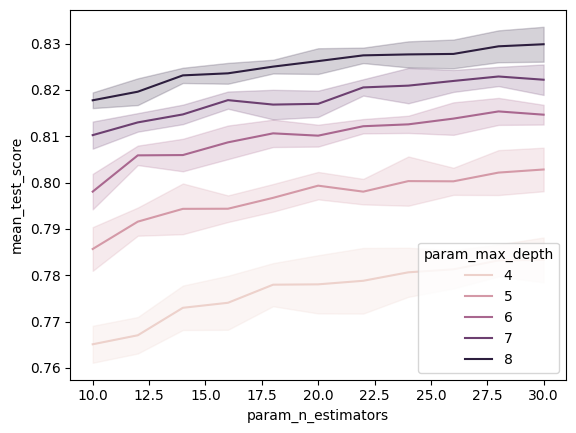

In [ ]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=res_rf)

## Save models

In [ ]:
import pickle

In [ ]:
with open('best_tree_model.pkl', 'wb') as f: # сохранили лучшую модель решающего дерева
    pickle.dump(best_tree, f)

with open('best_rf_model.pkl', 'wb') as f: # сохранили лучшую модель случайного леса
    pickle.dump(best_rf, f)

# Load models

## Load model RF

In [ ]:
import pickle

In [ ]:
with open('best_rf_model.pkl', 'rb') as f:
    best_rf = pickle.load(f)

best_rf

RandomForestClassifier(max_depth=8, n_estimators=30)

## Load model DT

In [ ]:
with open('best_tree_model.pkl', 'rb') as f:
    model_dt = pickle.load(f)

model_dt